In [1]:

!pip install pandas numpy scikit-learn matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Sample  Best Accuracy                                        Best Params
0     S1       0.635417  {'kernel': 'poly', 'gamma': 'auto', 'degree': ...
1     S2       0.597917  {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2...
2     S3       0.616667  {'kernel': 'rbf', 'gamma': 'auto', 'degree': 5...
3     S4       0.620833  {'kernel': 'rbf', 'gamma': 'scale', 'degree': ...
4     S5       0.622917  {'kernel': 'rbf', 'gamma': 'scale', 'degree': ...
5     S6       0.633333  {'kernel': 'rbf', 'gamma': 'scale', 'degree': ...
6     S7       0.631250  {'kernel': 'rbf', 'gamma': 'auto', 'degree': 5...
7     S8       0.606250  {'kernel': 'rbf', 'gamma': 'scale', 'degree': ...
8     S9       0.618750  {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2...
9    S10       0.650000  {'kernel': 'rbf', 'gamma': 'scale', 'degree': ...


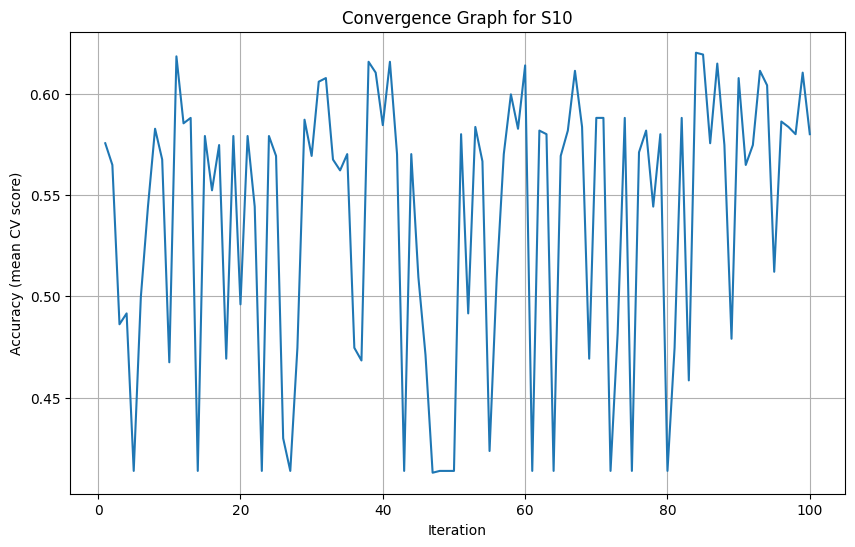

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

results = []
convergence_data = {}

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=i)

    param_dist = {
        'C': np.logspace(-3, 2, 50),
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4, 5],
    }

    svc = SVC()
    search = RandomizedSearchCV(svc, param_distributions=param_dist,
                                n_iter=100, cv=3, verbose=0, random_state=i, n_jobs=-1)
    search.fit(X_train, y_train)

    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results.append({
        "Sample": f"S{i+1}",
        "Best Accuracy": acc,
        "Best Params": search.best_params_
    })

    convergence_data[f"S{i+1}"] = search.cv_results_['mean_test_score']

results_df = pd.DataFrame(results)
best_sample = results_df.loc[results_df['Best Accuracy'].idxmax(), 'Sample']
print(results_df)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), convergence_data[best_sample])
plt.title(f"Convergence Graph for {best_sample}")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (mean CV score)")
plt.grid(True)
plt.show()